In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
!pip3 install tabula-py
import tabula

You are using pip version 19.0.3, however version 20.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
def listToString(s):  
    # initialize an empty string 
    str1 = ""  
    
    # traverse in the string   
    for ele in s:  
        str1 += ele   
    
    # return string   
    return str1  

# Define the file path of bank statement
filepath = "/Users/runchentao/Desktop/bank_statement2.pdf"

# Read transcation table using tabula
data = tabula.read_pdf(filepath,pages='all', multiple_tables=True, pandas_options={'header': None})

# Concatenate tables from different pages if necessary
df = pd.concat(data)
df

,0,1,2,3,4,5
0,DATE,PARTICULARS,Memo,WITHDRAW,DEPOSIT,BALANCE
1,1-Jan-19,Chase ATM,ATM Withdrawal from\rthe San Jose Chase\rbank ...,100,0,319.08
2,1-Jan-19,Chase ATM,ATM Withdrawal from\rthe Cupertino Chase\rbank...,100,0,219.08
3,1-Jan-19,Chase ATM,ATM Withdrawal,100,0,119.08
4,1-Jan-19,Chase ATM,ATM Withdrawal,100,0,19.08
...,...,...,...,...,...,...
1,23-Jan-19,Chase ATM,ATM Deposit,0,100,"5,400.00"
2,23-Jan-19,Chase ATM,ATM Deposit,0,100,"5,500.00"
3,23-Jan-19,Chase ATM,ATM Deposit,0,100,"5,600.00"
4,23-Jan-19,Chase ATM,ATM Deposit,0,100,"5,700.00"


In [3]:
# Data cleaning: drop any null values and fill with blank
df.dropna (how = 'all', inplace = True)
df.fillna("", inplace= True)
df

,0,1,2,3,4,5
0,DATE,PARTICULARS,Memo,WITHDRAW,DEPOSIT,BALANCE
1,1-Jan-19,Chase ATM,ATM Withdrawal from\rthe San Jose Chase\rbank ...,100,0,319.08
2,1-Jan-19,Chase ATM,ATM Withdrawal from\rthe Cupertino Chase\rbank...,100,0,219.08
3,1-Jan-19,Chase ATM,ATM Withdrawal,100,0,119.08
4,1-Jan-19,Chase ATM,ATM Withdrawal,100,0,19.08
...,...,...,...,...,...,...
1,23-Jan-19,Chase ATM,ATM Deposit,0,100,"5,400.00"
2,23-Jan-19,Chase ATM,ATM Deposit,0,100,"5,500.00"
3,23-Jan-19,Chase ATM,ATM Deposit,0,100,"5,600.00"
4,23-Jan-19,Chase ATM,ATM Deposit,0,100,"5,700.00"


In [4]:
# Size of the table
df.size

366

In [ ]:
# Category text classification

In [5]:
# Rename the columns
df.columns = ['Transation_Date', 'Type', 'Memo' , 'Withdraw', 'Deposit', 'Balance']

# Drop first row since we rename the columns
df = df.drop(0)
df

,Transation_Date,Type,Memo,Withdraw,Deposit,Balance
1,1-Jan-19,Chase ATM,ATM Withdrawal from\rthe San Jose Chase\rbank ...,100,0,319.08
2,1-Jan-19,Chase ATM,ATM Withdrawal from\rthe Cupertino Chase\rbank...,100,0,219.08
3,1-Jan-19,Chase ATM,ATM Withdrawal,100,0,119.08
4,1-Jan-19,Chase ATM,ATM Withdrawal,100,0,19.08
5,2-Jan-19,Salary,Income payment,0,"10,103.66","10,122.74"
6,2-Jan-19,Chase ATM,ATM Withdrawal,100,0,"10,022.74"
7,2-Jan-19,Chase ATM,ATM Withdrawal,100,0,"9,922.74"
8,3-Jan-19,Shopping,Amazon Prime Online\rOrder Payment,"9,500.00",0,422.74
9,7-Jan-19,Salary,Payroll Income,0,"6,490.89","6,913.63"
10,7-Jan-19,Shopping,eBay Online Purchase\rPayment,"6,000.00",0,913.63


In [61]:
df.reset_index( inplace = True)
df = df.drop('index', 1)
df

,Transation_Date,Type,Memo,Withdraw,Deposit,Balance
0,1-Jan-19,Chase ATM,ATM Withdrawal from\rthe San Jose Chase\rbank ...,100,0,319.08
1,1-Jan-19,Chase ATM,ATM Withdrawal from\rthe Cupertino Chase\rbank...,100,0,219.08
2,1-Jan-19,Chase ATM,ATM Withdrawal,100,0,119.08
3,1-Jan-19,Chase ATM,ATM Withdrawal,100,0,19.08
4,2-Jan-19,Salary,Income payment,0,"10,103.66","10,122.74"
5,2-Jan-19,Chase ATM,ATM Withdrawal,100,0,"10,022.74"
6,2-Jan-19,Chase ATM,ATM Withdrawal,100,0,"9,922.74"
7,3-Jan-19,Shopping,Amazon Prime Online\rOrder Payment,"9,500.00",0,422.74
8,7-Jan-19,Salary,Payroll Income,0,"6,490.89","6,913.63"
9,7-Jan-19,Shopping,eBay Online Purchase\rPayment,"6,000.00",0,913.63


In [6]:
# Export data for fraud detection
df.to_csv('fraud_detection_input.csv')

In [7]:
# Get the column needed for data processing
col = ['Type', 'Memo']
df2 = df[col]
df2.columns=['Category', 'Memo']
df2

,Category,Memo
1,Chase ATM,ATM Withdrawal from\rthe San Jose Chase\rbank ...
2,Chase ATM,ATM Withdrawal from\rthe Cupertino Chase\rbank...
3,Chase ATM,ATM Withdrawal
4,Chase ATM,ATM Withdrawal
5,Salary,Income payment
6,Chase ATM,ATM Withdrawal
7,Chase ATM,ATM Withdrawal
8,Shopping,Amazon Prime Online\rOrder Payment
9,Salary,Payroll Income
10,Shopping,eBay Online Purchase\rPayment


In [8]:
# Create catefory id for each category
#df2.insert(2, 'category_id', df2['Category'].factorize()[0])
df2['category_id'] = df2['Category'].factorize()[0]
category_id_df = df2[['Category', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Category']].values)
df2

/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Category,Memo,category_id
1,Chase ATM,ATM Withdrawal from\rthe San Jose Chase\rbank ...,0
2,Chase ATM,ATM Withdrawal from\rthe Cupertino Chase\rbank...,0
3,Chase ATM,ATM Withdrawal,0
4,Chase ATM,ATM Withdrawal,0
5,Salary,Income payment,1
6,Chase ATM,ATM Withdrawal,0
7,Chase ATM,ATM Withdrawal,0
8,Shopping,Amazon Prime Online\rOrder Payment,2
9,Salary,Payroll Income,1
10,Shopping,eBay Online Purchase\rPayment,2


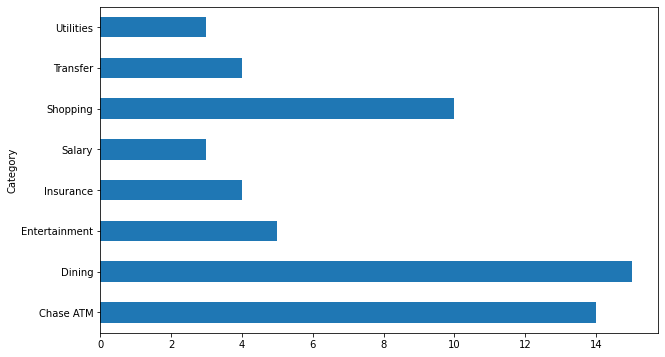

In [9]:
# View the number of categories and their number of transactions
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
df2.groupby('Category').Memo.count().plot.barh(ylim=0)
plt.show()

In [10]:
# Feature extraction from text
#  tf-idf: inverse document term frequency
#  mindf: min # of word to present to be kept
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=1, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df2.Memo).toarray()
labels = df2.category_id
features.shape

(58, 122)

In [11]:
# Find the terms that are most related with each category
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for Category, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Category))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'Chase ATM':
  . Most correlated unigrams:
. deposit
. atm
  . Most correlated bigrams:
. atm withdrawal
. atm deposit
# 'Dining':
  . Most correlated unigrams:
. burger
. restaurant
  . Most correlated bigrams:
. panda express
. chinese restaurant
# 'Entertainment':
  . Most correlated unigrams:
. movie
. ticket
  . Most correlated bigrams:
. amc theater
. movie ticket
# 'Insurance':
  . Most correlated unigrams:
. aaa
. insurance
  . Most correlated bigrams:
. geico insurance
. aaa insurance
# 'Salary':
  . Most correlated unigrams:
. payroll
. income
  . Most correlated bigrams:
. payroll income
. income payment
# 'Shopping':
  . Most correlated unigrams:
. online
. store
  . Most correlated bigrams:
. amazon prime
. online store
# 'Transfer':
  . Most correlated unigrams:
. outgoing
. transfer
  . Most correlated bigrams:
. incoming transfer
. outgoing transfer
# 'Utilities':
  . Most correlated unigrams:
. water
. mobile
  . Most correlated bigrams:
. atm deposit
. pg payment


In [12]:
# Split train and test, use Naive Bayes classifier perform fitting
# simple for word and text
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(df2['Memo'], df2['Category'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [13]:
# Sample prediction
print(clf.predict(count_vect.transform(["Nike Store Purchase"])))

['Shopping']


In [14]:
print(clf.predict(count_vect.transform(["Panda Express"])))

['Dining']


In [15]:
print(clf.predict(count_vect.transform(["ATM withdrawal from SF Chase Bank"])))

['Chase ATM']


In [16]:
print(clf.predict(count_vect.transform(["Outgoing Transfer to James"])))

['Transfer']


In [17]:
print(clf.predict(count_vect.transform(["AMC Movie Ticket"])))

['Entertainment']


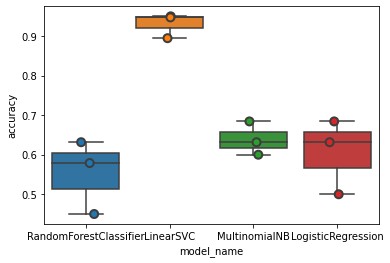

In [18]:
# Compare different model performance
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 3
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [19]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.930702
LogisticRegression        0.605263
MultinomialNB             0.638596
RandomForestClassifier    0.553509
Name: accuracy, dtype: float64

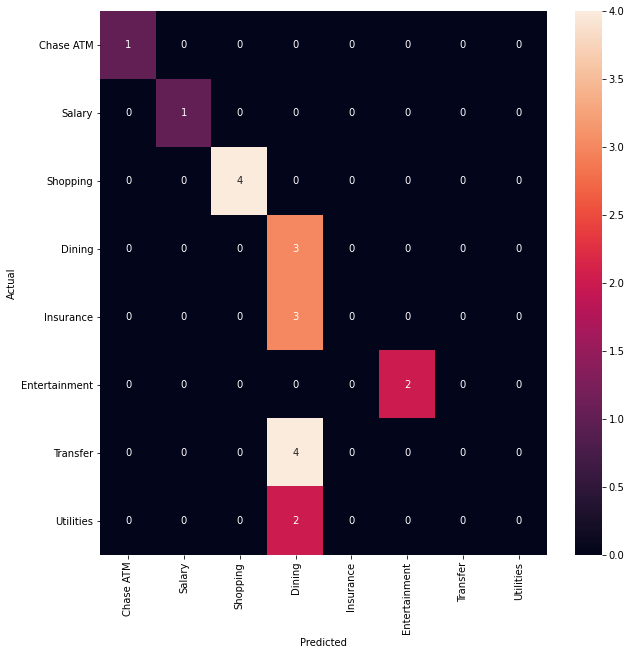

In [20]:
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Category.values, yticklabels=category_id_df.Category.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [21]:
from IPython.display import display

for predicted in category_id_df.category_id:
    for actual in category_id_df.category_id:
        if predicted != actual and conf_mat[actual, predicted] >= 2:
            print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
            display(df2.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['Category', 'Memo']])
            print('')

'Insurance' predicted as 'Dining' : 3 examples.


,Category,Memo
12,Insurance,Geico Insurance
12,Dining,Japanese Restaurant
7,Chase ATM,ATM Withdrawal
7,Insurance,State Farm Insurance
17,Insurance,Car Insurance



'Transfer' predicted as 'Dining' : 4 examples.


,Category,Memo
27,Transfer,Outgoing Transfer
18,Transfer,Incoming Transfer
26,Transfer,Incoming Transfer
22,Transfer,Outgoing Transfer



'Utilities' predicted as 'Dining' : 2 examples.


,Category,Memo
20,Utilities,AT&T Mobile Bill
19,Utilities,PG&E Bill Payment
